<a href="https://colab.research.google.com/github/saranyatripurari/FMML_LABS_PROJECTS/blob/main/FMML_2024_Module_04_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


# Notebook Imports and Packages

In [66]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [67]:
def f(x):
    return x ** 2 + x + 1

In [68]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

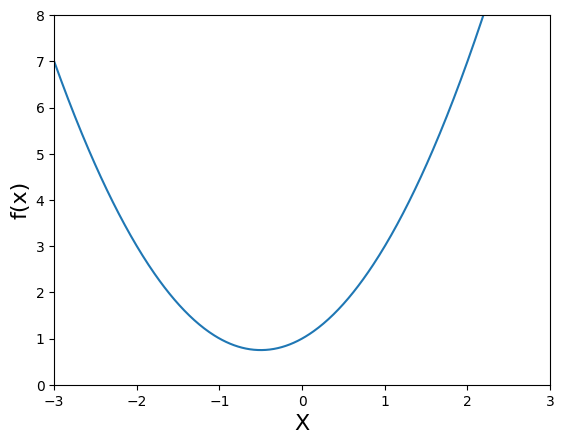

In [69]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [70]:
def df(x):
    return 2 * x + 1

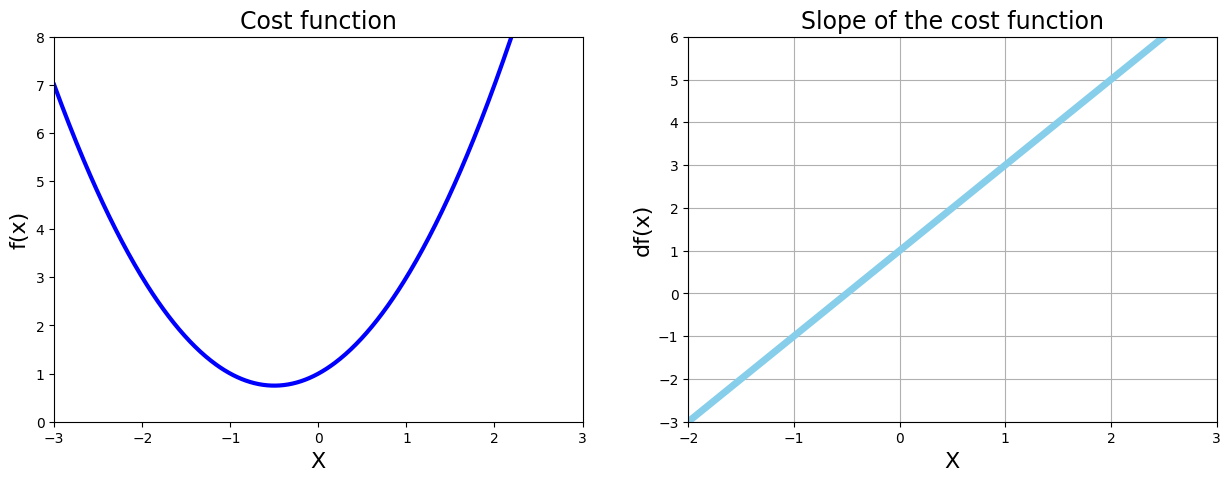

In [71]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [72]:
#
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # [REQUIRED]: Compute the gradient (slope of f(x) at previous_x)
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED]: Update new_x using the gradient and step size

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))  # [REQUIRED]: Append the gradient at new_x to slope_list

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

In [73]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return ## [REQUIRED]

def dg(x):
    return ## [REQUIRED]

In [74]:
## TASK-3 : Plot function and derivative side by side like has been done earlier

## Gradient Descent

In [75]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [76]:
def gradient_descent(dg, start_x, learning_rate, precision):
    """
    Performs gradient descent to find a local minimum of a function.

    Parameters:
    dg: function - Derivative of the function to minimize.
    start_x: float - Initial starting point for gradient descent.
    learning_rate: float - Step size multiplier for each iteration.
    precision: float - Threshold for stopping when step size is small.

    Returns:
    local_min: float - The x-value of the local minimum.
    list_x: list - List of x-values at each step of gradient descent.
    deriv_list: list - List of derivative values at each step.
    """
    current_x = start_x
    list_x = [current_x]
    deriv_list = [dg(current_x)]

    while True:
        gradient = dg(current_x)
        next_x = current_x - learning_rate * gradient

        list_x.append(next_x)
        deriv_list.append(dg(next_x))

        step_size = abs(next_x - current_x)
        if step_size < precision:
            break

        current_x = next_x

    local_min = current_x
    return local_min, list_x, deriv_list


# Example usage
def example_function_derivative(x):
    return 2 * x - 4  # Derivative of the function f(x) = x^2 - 4x

local_min, list_x, deriv_list = gradient_descent(example_function_derivative, 0.5, 0.02, 0.001)

print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.9757067401232566
Number of steps: 103


In [77]:
def gradient_descent(derivative_func, initial_guess, multiplier, precision):
    """
    Performs gradient descent to find a local minimum of a function.

    Parameters:
    derivative_func: function - The derivative of the function to minimize.
    initial_guess: float - Starting point for gradient descent.
    multiplier: float - Learning rate or step size.
    precision: float - Minimum threshold for stopping gradient descent.

    Returns:
    local_min: float - The x-value of the local minimum.
    list_x: list - List of x-values at each iteration.
    deriv_list: list - List of derivative values at each iteration.
    """
    current_x = initial_guess
    list_x = [current_x]
    deriv_list = [derivative_func(current_x)]

    while True:
        gradient = derivative_func(current_x)
        next_x = current_x - multiplier * gradient

        list_x.append(next_x)
        deriv_list.append(derivative_func(next_x))

        step_size = abs(next_x - current_x)
        if step_size < precision:
            break

        current_x = next_x

    local_min = current_x
    return local_min, list_x, deriv_list


# Example usage
def dg(x):
    return 2 * x - 4  # Example: derivative of f(x) = x^2 - 4x

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5,
                                                 multiplier=0.01, precision=0.0001)

print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.9950389760693616
Number of steps: 310


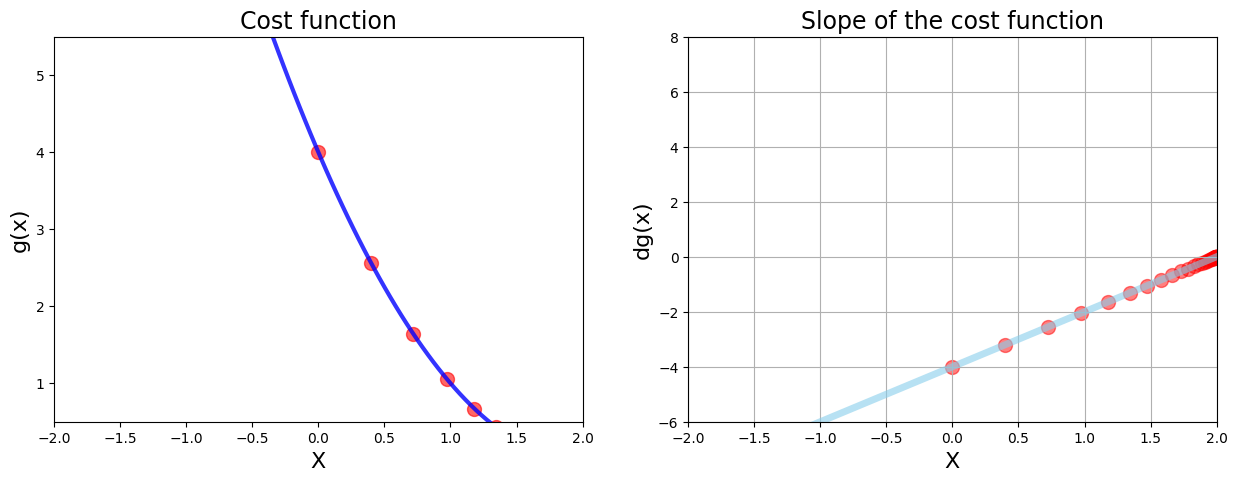

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def g(x):
    return x**2 - 4*x + 4  # Example cost function

def dg(x):
    return 2*x - 4  # Derivative of g(x)

# Define a range of x-values for plotting
x_2 = np.linspace(-2, 2, 100)

# Gradient Descent Function
def gradient_descent(derivative_func, initial_guess, multiplier=0.1, precision=0.0001):
    current_x = initial_guess
    list_x = [current_x]
    deriv_list = [derivative_func(current_x)]

    while True:
        gradient = derivative_func(current_x)
        next_x = current_x - multiplier * gradient

        list_x.append(next_x)
        deriv_list.append(derivative_func(next_x))

        step_size = abs(next_x - current_x)
        if step_size < precision:
            break

        current_x = next_x

    local_min = current_x
    return local_min, list_x, deriv_list

# Calling the gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)

# Plot function and derivative, with scatter plots of gradient descent points
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2nd Chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

In [79]:
## TASK-4 : Code the same things as they were done for the first two examples

#### Learning Rate

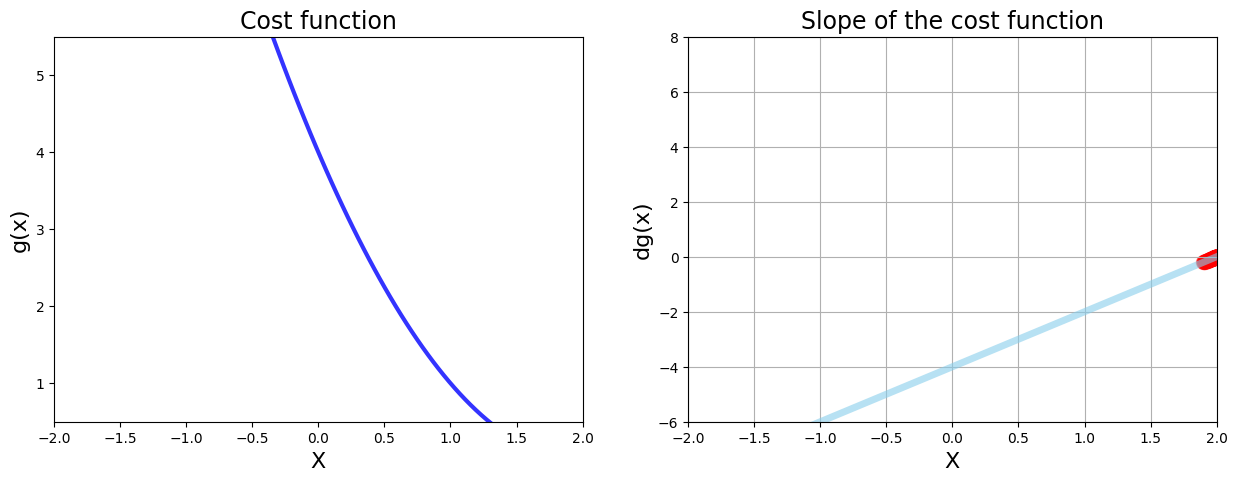

Number of steps is:  93


In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function and its derivative
def g(x):
    return x**2 - 4*x + 4  # Example cost function: a simple quadratic

def dg(x):
    return 2*x - 4  # Derivative of the cost function

# Define a range of x-values for plotting
x_2 = np.linspace(-2, 2, 100)

# Gradient Descent Function
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.0001, max_iter=500):
    """
    Performs gradient descent to find a local minimum of a function.

    Parameters:
    derivative_func: function - The derivative of the function to minimize.
    initial_guess: float - Starting point for gradient descent.
    multiplier: float - Learning rate or step size.
    precision: float - Minimum threshold for stopping gradient descent.
    max_iter: int - Maximum number of iterations to prevent infinite loops.

    Returns:
    local_min: float - The x-value of the local minimum.
    list_x: list - List of x-values at each iteration.
    deriv_list: list - List of derivative values at each iteration.
    """
    current_x = initial_guess
    list_x = [current_x]
    deriv_list = [derivative_func(current_x)]

    for _ in range(max_iter):
        gradient = derivative_func(current_x)
        next_x = current_x - multiplier * gradient

        list_x.append(next_x)
        deriv_list.append(derivative_func(next_x))

        step_size = abs(next_x - current_x)
        if step_size < precision:
            break

        current_x = next_x

    local_min = current_x
    return local_min, list_x, deriv_list


# Calling the gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative, with scatter plots of gradient descent points
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2nd Chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

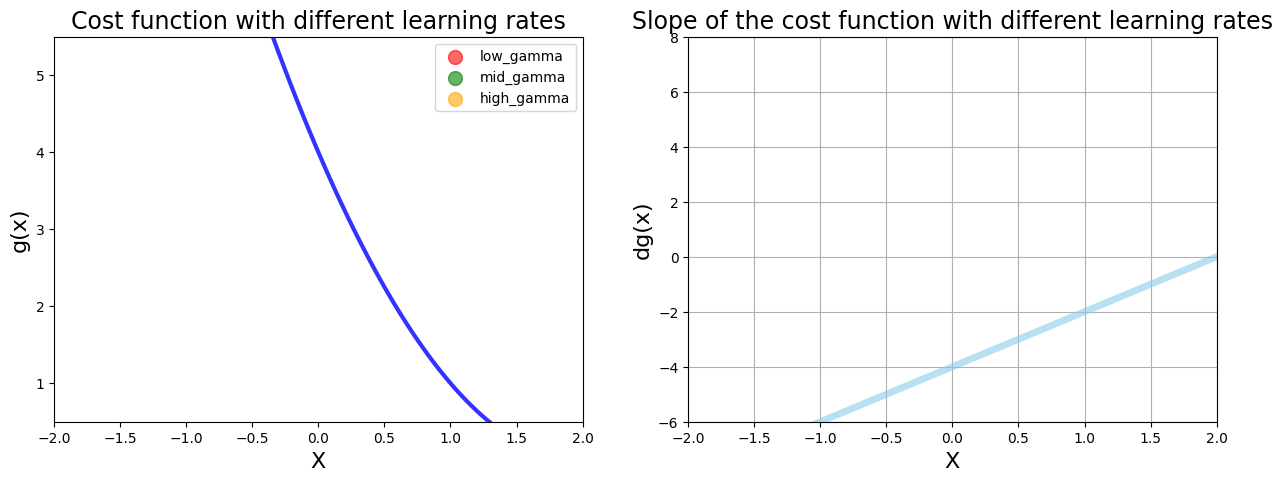

Low gamma steps: 101
Mid gamma steps: 101
High gamma steps: 101


In [81]:
# Run gradient descent with different learning rates
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)

# Plotting the results
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function for different learning rates
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost function with different learning rates', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

# Plot for low, mid, and high learning rates
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(low_gamma[1], g(np.array(low_gamma[1])), color='red', s=100, alpha=0.6, label='low_gamma')
plt.scatter(mid_gamma[1], g(np.array(mid_gamma[1])), color='green', s=100, alpha=0.6, label='mid_gamma')
plt.scatter(high_gamma[1], g(np.array(high_gamma[1])), color='orange', s=100, alpha=0.6, label='high_gamma')
plt.legend()

# 2nd Chart: Derivative for different learning rates
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function with different learning rates', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

# Plot for derivatives with different learning rates
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(low_gamma[1], low_gamma[2], color='red', s=100, alpha=0.5)
plt.scatter(mid_gamma[1], mid_gamma[2], color='green', s=100, alpha=0.5)
plt.scatter(high_gamma[1], high_gamma[2], color='orange', s=100, alpha=0.5)

plt.show()

# Print the results for each learning rate
print('Low gamma steps:', len(low_gamma[1]))
print('Mid gamma steps:', len(mid_gamma[1]))
print('High gamma steps:', len(high_gamma[1]))

In [82]:
## TASK-7 : Plot reduction in cost for each iteration

### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [83]:
## TASK-8 : Code the same things as they were done for the first two examples

In [84]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Define the function f(x, y)
def f(x, y):
    return x**2 + y**2  # Example cost function: a simple paraboloid

# Create a meshgrid for x and y values
x_4 = np.linspace(-5, 5, 100)
y_4 = np.linspace(-5, 5, 100)
x_4, y_4 = np.meshgrid(x_4, y_4)

# Generate the 3D surface plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

# Labels for axes
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plotting the surface
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

# Show the plot
plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 1600x1200 with 0 Axes>

### TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = ## [REQUIRED]

#### $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [87]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  x**2 + y**2
Partial derivative wrt x is:  2*y
Value of f(x,y) at x=1.8 y=1.0 is:  4.24000000000000
Value of partial derivative wrt x:  3.60000000000000


#### Batch Gradient Descent with SymPy

*   List item
*   List item



In [88]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979496953e-48 8.76866552760853e-49]
Minimum occurs at x value of:  6.31343917987813e-49
Minimum occurs at y value of:  3.50746621104341e-49
The cost is:  5.21618334996315e-97


In [89]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return ## [REQUIRED]

def fpy(x, y):
    return ## [REQUIRED]

In [90]:
import numpy as np

# Define the cost function f(x, y)
def f(x, y):
    return x**2 + y**2  # Example: A simple paraboloid

# Define the partial derivatives (gradients)
def fpx(x, y):
    return 2 * x  # Partial derivative with respect to x

def fpy(x, y):
    return 2 * y  # Partial derivative with respect to y

# Setup for gradient descent
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess

# Gradient descent loop
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979e-48 8.76866553e-49]
Minimum occurs at x value of:  6.313439179878134e-49
Minimum occurs at y value of:  3.507466211043411e-49
The cost is:  5.216183349963152e-97




```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

In [91]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [1.86728201e-19 1.03737889e-19]
Minimum occurs at x value of:  7.469128023985783e-20
Minimum occurs at y value of:  4.149515568880998e-20
The cost is:  7.300635289507557e-39


In [92]:
# import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Define the cost function f(x, y)
def f(x, y):
    return x**2 + y**2  # Example: A simple paraboloid

# Define the partial derivatives (gradients)
def fpx(x, y):
    return 2 * x  # Partial derivative with respect to x

def fpy(x, y):
    return 2 * y  # Partial derivative with respect to y

# Gradient descent setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # Initial guess
values_array = []

# Gradient descent loop
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array.append(params)  # Store the current values of x and y

values_array = np.array(values_array)  # Convert list to numpy array

# Create meshgrid for plotting
x_4 = np.linspace(-5, 5, 100)
y_4 = np.linspace(-5, 5, 100)
x_4, y_4 = np.meshgrid(x_4, y_4)

# Generate the 3D surface plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

# Labels for axes
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot the surface
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

# Plot the red points (gradient descent steps)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

# Show the plot
plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 1600x1200 with 0 Axes>

#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [93]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [94]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


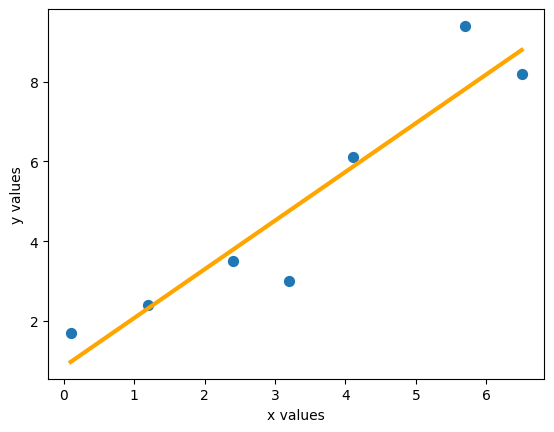

In [95]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [96]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [97]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [98]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [99]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

#### Calc MSE using nested for loops

In [100]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

<ipython-input-100-050b7bf9b7b1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [102]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 1600x1200 with 0 Axes>

In [111]:
# Printing the minimum value of the plot_cost
print('Min value of plot_cost:', plot_cost.min())

# Finding the indices of the minimum cost in the 2D grid
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)

# Printing the values of Theta 0 and Theta 1 at the specific indices
print('Min MSE for Theta 0 at plot_t0[111][91]:', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]:', plot_t1[111][91])

# Printing the minimum MSE for Theta 0 and Theta 1 at the minimum indices
min_theta_0 = plot_t0[ij_min]
min_theta_1 = plot_t1[ij_min]
print(f'Min MSE for Theta 0 at {min_theta_0}:', plot_cost[ij_min])
print(f'Min MSE for Theta 1 at {min_theta_1}:', plot_cost[ij_min])

Min value of plot_cost: 25.213797805083377
Min occurs at (i,j): (64, 86)


IndexError: index 111 is out of bounds for axis 0 with size 100

#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [104]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [105]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Example function for Mean Squared Error (MSE)
def compute_mse(theta_0, theta_1, X, y):
    predictions = theta_0 + theta_1 * X
    return np.mean((predictions - y) ** 2)

# Simulate data for demonstration purposes (e.g., linear regression data)
np.random.seed(0)
X = np.linspace(-10, 10, 100)  # Feature
y = 3 * X + 7 + np.random.normal(0, 5, 100)  # Target with some noise

# Initialize parameter values for plotting
theta_0_vals = np.linspace(-10, 10, 100)
theta_1_vals = np.linspace(-10, 10, 100)

# Create meshgrid for theta_0 and theta_1
plot_t0, plot_t1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Compute MSE for each pair of (theta_0, theta_1)
plot_cost = np.array([[compute_mse(t0, t1, X, y) for t0 in theta_0_vals] for t1 in theta_1_vals])

# Simulate gradient descent (for demonstration purposes)
# In practice, this will be the parameters found by gradient descent
plot_vals = np.array([[theta_0, theta_1] for theta_0 in np.linspace(-5, 5, 10)
                                          for theta_1 in np.linspace(-5, 5, 10)])

# Compute MSE for each gradient descent step
mse_vals = np.array([compute_mse(t[0], t[1], X, y) for t in plot_vals])

# Plotting MSE in 3D
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

# Labels for axes
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Scatter plot of parameter steps (e.g., gradient descent steps)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')

# Surface plot of MSE over the parameter space
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)

# Show the plot
plt.show()